In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wbgapi as wb
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.optimize as opt
from scipy.stats import norm

In [3]:
#Choosing 4 countries from different continents to make the analysis global
country_codes = ["GBR","CHN","IND","NGA"]

In [4]:
#Selectiong Indicators from World Bank
indicator_ids = ["SL.UEM.TOTL.ZS","NY.GDP.PCAP.CD","NE.IMP.GNFS.ZS","NY.GDP.MKTP.KD.ZG"]
indicator_ids

['SL.UEM.TOTL.ZS', 'NY.GDP.PCAP.CD', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.KD.ZG']

In [5]:
#Crating a function to load data using the indicators from World Bank 
def readind (df):
    """
    this function creates a dataframe using the indicators from World Bank
    the indicators are required to be defined and called with this function
    """
    my_df = wb.data.DataFrame(df, country_codes, range(2000, 2019), columns  = 'series', numericTimeKeys = True)
    print(my_df)

In [6]:
#my_df = readind(indicator_ids)

In [7]:
#Unfortunately the output of the function becomes NoneTYpe insted of becoming a DataFrame. 
#I had to abandon the function and use regular method.
df = wb.data.DataFrame(indicator_ids, country_codes,  range(2000, 2019), columns  = 'series', numericTimeKeys = True)

In [8]:
df.head()

NE.IMP.GNFS.ZS  NY.GDP.MKTP.KD.ZG  NY.GDP.PCAP.CD  \
economy time                                                      
CHN     2000       18.517094           8.490093      959.372484   
        2001       18.215214           8.335733     1053.108243   
        2002       20.102658           9.133631     1148.508290   
        2003       24.823231          10.038030     1288.643252   
        2004       28.444187          10.113621     1508.668098   

              SL.UEM.TOTL.ZS  
economy time                  
CHN     2000            3.26  
        2001            3.80  
        2002            4.24  
        2003            4.58  
        2004            4.49

In [9]:
#Adding duplicate columns if the indicators with header names 

df.index.names = ['country', 'year']
df["unemployment%"] =  pd.to_numeric(df['SL.UEM.TOTL.ZS'])
df["gdp per cap"] = pd.to_numeric(df["NY.GDP.PCAP.CD"])
df["imports%"] = pd.to_numeric(df["NE.IMP.GNFS.ZS"])
df["gdp growth%"] = pd.to_numeric(df["NY.GDP.MKTP.KD.ZG"])


In [10]:
#Removing the existing indicator columns
df = df.iloc[:,[-4,-3,-2,-1]]
df.head()

unemployment%  gdp per cap   imports%  gdp growth%
country year                                                    
CHN     2000           3.26   959.372484  18.517094     8.490093
        2001           3.80  1053.108243  18.215214     8.335733
        2002           4.24  1148.508290  20.102658     9.133631
        2003           4.58  1288.643252  24.823231    10.038030
        2004           4.49  1508.668098  28.444187    10.113621

In [11]:
print(df.describe())

       unemployment%   gdp per cap   imports%  gdp growth%
count      76.000000     76.000000  76.000000    76.000000
mean        5.048368  12040.715343  22.422682     5.863421
std         1.172339  17043.150818   6.217048     3.527358
min         3.260000    443.314194  10.666342    -4.247356
25%         4.302500   1283.578304  17.622845     2.645169
50%         4.710000   2217.558415  22.679292     6.562060
75%         5.544500  14380.618709  27.510058     7.998604
max         8.456000  50653.256915  31.807826    15.329156


In [12]:
#Checking correlation coefficient of the indicators
df_corr = df.corr()
df_corr.style.background_gradient(cmap='coolwarm')

,unemployment%,gdp per cap,imports%,gdp growth%
unemployment%,1.000000,0.335002,0.296705,-0.538447
gdp per cap,0.335002,1.000000,0.607395,-0.648629
imports%,0.296705,0.607395,1.000000,-0.181198
gdp growth%,-0.538447,-0.648629,-0.181198,1.000000


In [13]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled

In [14]:
def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [15]:
df = df.reset_index(level=[1])
df.head()

,year,unemployment%,gdp per cap,imports%,gdp growth%
country,,,,,
CHN,2000,3.26,959.372484,18.517094,8.490093
CHN,2001,3.80,1053.108243,18.215214,8.335733
CHN,2002,4.24,1148.508290,20.102658,9.133631
CHN,2003,4.58,1288.643252,24.823231,10.038030
CHN,2004,4.49,1508.668098,28.444187,10.113621


In [16]:
#Normalizing the data
df_norm = norm_df(df)
df_norm.head()

,year,unemployment%,gdp per cap,imports%,gdp growth%
country,,,,,
CHN,2000,0.000000,0.010278,0.371343,0.650650
CHN,2001,0.103926,0.012145,0.357064,0.642765
CHN,2002,0.188607,0.014045,0.446341,0.683523
CHN,2003,0.254042,0.016836,0.669626,0.729721
CHN,2004,0.236720,0.021218,0.840899,0.733582


In [17]:
print(df_norm.describe())
print()

             year  unemployment%  gdp per cap   imports%  gdp growth%
count    76.00000      76.000000    76.000000  76.000000    76.000000
mean   2009.00000       0.344182     0.230978   0.556079     0.516475
std       5.51362       0.225623     0.339438   0.294069     0.180183
min    2000.00000       0.000000     0.000000   0.000000     0.000000
25%    2004.00000       0.200635     0.016735   0.329045     0.352081
50%    2009.00000       0.279061     0.035337   0.568217     0.552163
75%    2014.00000       0.439665     0.277581   0.796714     0.625544
max    2018.00000       1.000000     1.000000   1.000000     1.000000



In [18]:
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(8,8))
    plt.plot(df[col1], df[col2], "o", markersize=7)
    
    plt.xlabel(col1, size = 30)
    plt.ylabel(col2, size = 30)
    plt.show()

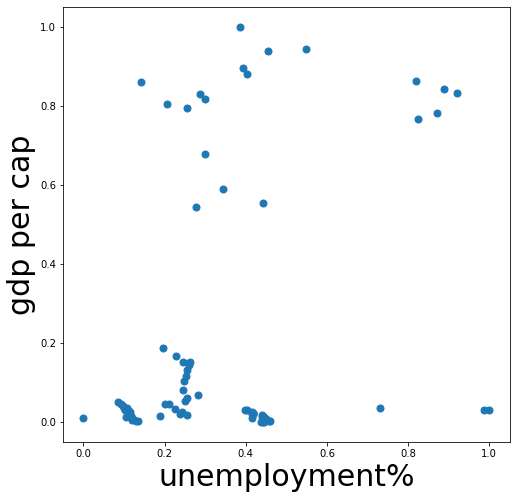

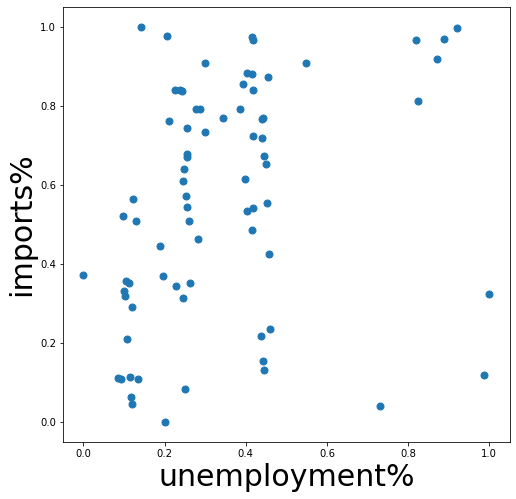

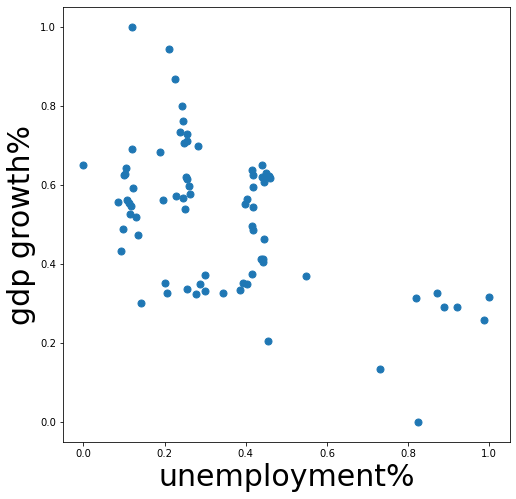

In [19]:
#Exploratory plots
makeplot(df_norm, "unemployment%", "gdp per cap")
makeplot(df_norm, "unemployment%", "imports%")
makeplot(df_norm, "unemployment%", "gdp growth%")

Based on the three plots, I've choosen "unemployment%" vs "gdp per cap" as the proper plot for clustering.
After analysis the dot points, I've gone for 5 clusters as it seems there are 5 set of dot on the plot.

In [20]:
#Kmeans setting up the clusterer, 5 expected clusters
kmeans = cluster.KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

In [21]:
#Extracting columns for fitting
df_fit = df[["unemployment%", "gdp per cap"]].copy()
kmeans.fit(df_fit)   

KMeans(n_clusters=5)

In [22]:
#Extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

<Figure size 360x360 with 0 Axes>

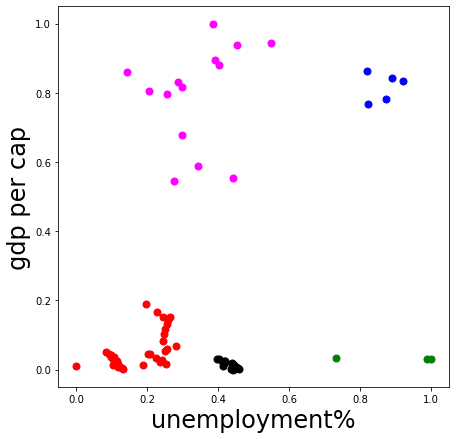

In [23]:
#Plotting by using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta","black"]
plt.figure(figsize=(7, 7))
for l in range(5):     # loop over the different labels
    plt.plot(df_fit["unemployment%"][labels==l], df_fit["gdp per cap"][labels==l], "o", markersize=7, color=col[l])
    
plt.xlabel("unemployment%", size = 24)
plt.ylabel("gdp per cap", size = 24)
plt.show()

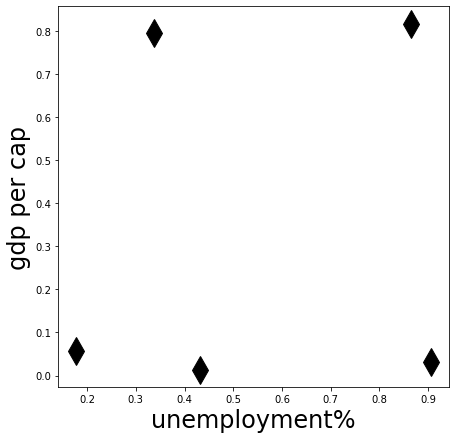

In [24]:
#Showing cluster centers
plt.figure(figsize=(7, 7))
for ic in range(5):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=20)
    
plt.xlabel("unemployment%", size = 24)
plt.ylabel("gdp per cap", size = 24)
plt.show()

### Fitting

In [25]:
#Selecting only one country (United Kingdom) and the percentage of Imports of goods and services
country_1 = ["GBR"]
indicator_1 = ["NE.IMP.GNFS.ZS"]
df_gbr = wb.data.DataFrame(indicator_1,country_1, range(1991, 2019), columns='series', numericTimeKeys=True)
df_gbr["imports%"] = pd.to_numeric(df_gbr["NE.IMP.GNFS.ZS"])
df_gbr = df_gbr.drop(['NE.IMP.GNFS.ZS'], axis =1)
df_gbr.index.names = ['year']
df_gbr = df_gbr.reset_index(level=[0])
df_gbr.describe()

,year,imports%
count,28.000000,28.000000
mean,2004.500000,27.628096
std,8.225975,2.588759
min,1991.000000,22.697795
25%,1997.750000,25.679625
50%,2004.500000,27.382942
75%,2011.250000,29.862385
max,2018.000000,31.807826


In [26]:
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    
    f = scale * np.exp(growth * (t-1950)) 
    
    return f

In [27]:
def logistics(t, scale, growth, t0):
    """ Computes logistics function with scale, growth rate
    and time of the turning point as free parameters
    """
    
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    
    return f

In [28]:
#Fitting exponential growth
popt, covar = opt.curve_fit(exp_growth, df_gbr["year"], 
                            df_gbr["imports%"])

covar

array([[ 4.58066464e-25, -2.26238412e-20],
       [-2.26238412e-20,  1.11743243e-15]])

Fit parameter [2.16417471e-14 9.99999994e-01]


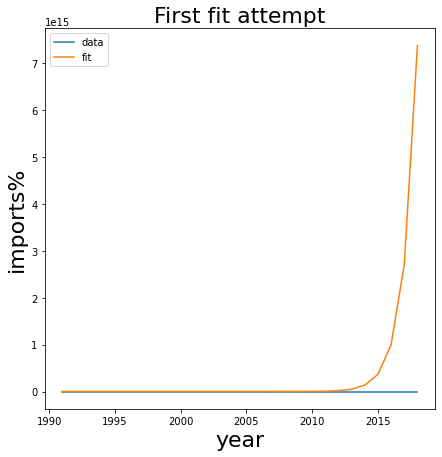

In [29]:
print("Fit parameter", popt)

#Using *popt to pass on the fit parameters
df_gbr["imports exp%"] = exp_growth(df_gbr["year"], *popt)

plt.figure(figsize=(7,7))
plt.plot(df_gbr["year"], df_gbr["imports%"], label="data")
plt.plot(df_gbr["year"], df_gbr["imports exp%"], label="fit")

plt.legend()
plt.title("First fit attempt", size = 22)
plt.xlabel("year", size = 22)
plt.ylabel("imports%", size = 22)
plt.show()
print()

Finding a start approximation for the logistics function

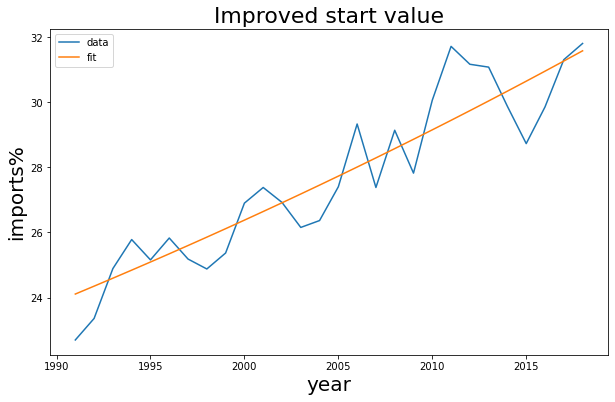

In [30]:
#The start value was adjusted based on multiple outcomes
#The scale factor is way too small. The exponential factor too large. 
#growth of 0.01 gives a reasonable start value
popt = [16, 0.01]
df_gbr["imports exp%"] = exp_growth(df_gbr["year"], *popt)

plt.figure(figsize=(10,6))
plt.plot(df_gbr["year"], df_gbr["imports%"], label="data")
plt.plot(df_gbr["year"], df_gbr["imports exp%"], label="fit")

plt.legend()
plt.xlabel("year", size = 20)
plt.ylabel("imports%", size = 20)
plt.title("Improved start value", size = 22)
plt.show()


Fit parameter [1.55453815e+01 1.04863554e-02]


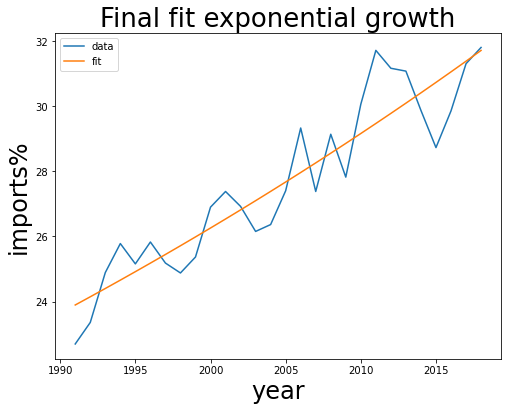

In [31]:
#Fitting exponential growth
popt, covar = opt.curve_fit(exp_growth, df_gbr["year"], 
                            df_gbr["imports%"], p0=[16, 0.01])

print("Fit parameter", popt)

df_gbr["imports exp%"] = exp_growth(df_gbr["year"], *popt)

plt.figure(figsize=(8,6))
plt.plot(df_gbr["year"], df_gbr["imports%"], label="data")
plt.plot(df_gbr["year"], df_gbr["imports exp%"], label="fit")

plt.legend()
plt.xlabel("year", size = 24)
plt.ylabel("imports%", size = 24)
plt.title("Final fit exponential growth", size = 26)
plt.show()
print()


Finding a start approximation for the logistics function

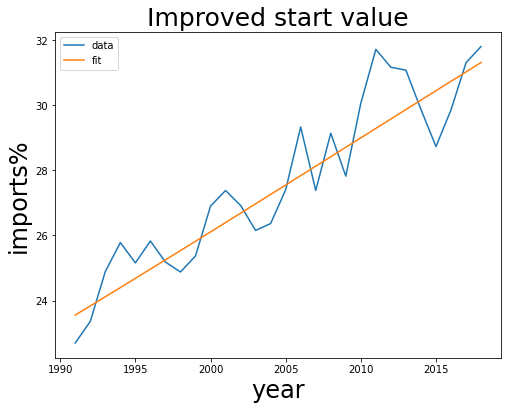

In [32]:
#Estimated turning year: 2010
#Import % rate in 2010 was 30.06
#Kept growth value from before
popt = [58, 0.02, 2010]
df_gbr["imports_log"] = logistics(df_gbr["year"], *popt)

plt.figure(figsize =(8,6))
plt.plot(df_gbr["year"], df_gbr["imports%"], label="data")
plt.plot(df_gbr["year"], df_gbr["imports_log"], label="fit")

plt.legend()
plt.xlabel("year", size = 24)
plt.ylabel("imports%", size = 24)
plt.title("Improved start value", size = 25)
plt.show()


Fit parameter [4.12493805e+01 3.22441996e-02 1.98221159e+03]


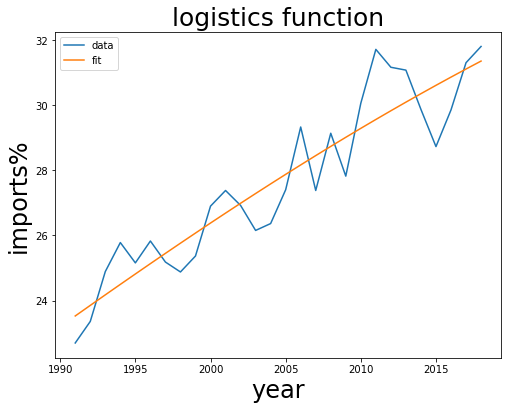

In [33]:
popt, covar = opt.curve_fit(logistics, df_gbr["year"], df_gbr["imports%"], 
                            p0=(58, 0.05, 2010), maxfev=5000)
print("Fit parameter", popt)
      
df_gbr["imports_log"] = logistics(df_gbr["year"], *popt)

plt.figure(figsize = (8,6))
plt.title("logistics function", size = 25)
plt.plot(df_gbr["year"], df_gbr["imports%"], label="data")
plt.plot(df_gbr["year"], df_gbr["imports_log"], label="fit")

plt.legend()
plt.xlabel("year", size = 24)
plt.ylabel("imports%", size = 24)
plt.show()


In [34]:
"""popt, covar = opt.curve_fit(logistics, df_gbr["year"], df_gbr["imports%"], 
                            p0=(50, 0.02, 2010), maxfev=5000)
print("Fit parameter", popt)
      
df_gbr["imports_log"] = logistics(df_gbr["year"], *popt)

plt.figure(figsize = (10,6))
plt.title("logistics function")
plt.plot(df_gbr["year"], df_gbr["imports%"], label="data")
plt.plot(df_gbr["year"], df_gbr["imports_log"], label="fit")

plt.legend()
#plt.ylim(0, 50)
plt.xlabel("year", size = 20)
plt.ylabel("imports%", size = 20)
plt.show()
"""

'popt, covar = opt.curve_fit(logistics, df_gbr["year"], df_gbr["imports%"], \n                            p0=(50, 0.02, 2010), maxfev=5000)\nprint("Fit parameter", popt)\n      \ndf_gbr["imports_log"] = logistics(df_gbr["year"], *popt)\n\nplt.figure(figsize = (10,6))\nplt.title("logistics function")\nplt.plot(df_gbr["year"], df_gbr["imports%"], label="data")\nplt.plot(df_gbr["year"], df_gbr["imports_log"], label="fit")\n\nplt.legend()\n#plt.ylim(0, 50)\nplt.xlabel("year", size = 20)\nplt.ylabel("imports%", size = 20)\nplt.show()\n'

In [35]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   



[14.31122967  0.0231467  17.7729414 ]


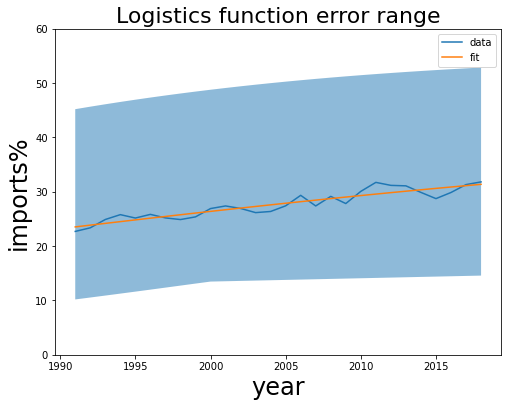

In [36]:
#Extracting the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(covar))
print(sigma)

low, up = err_ranges(df_gbr["year"], logistics, popt, sigma)

plt.figure(figsize = (8,6))
plt.title("Logistics function error range", size = 22)
plt.plot(df_gbr["year"], df_gbr["imports%"], label="data")
plt.plot(df_gbr["year"], df_gbr["imports_log"], label="fit")

plt.fill_between(df_gbr["year"], low, up, alpha=0.5)
plt.legend()
plt.ylim(0, 60)
plt.xlabel("year", size = 24)
plt.ylabel("imports%", size = 24)
plt.show()


Additional graphs for the poster

In [37]:
#Calculating average values of the indicators based on the countries
df_country = df.groupby(level='country',axis=0).mean()
df_country = df_country.iloc[:,[-4,-3,-2,-1]]
df_country

,unemployment%,gdp per cap,imports%,gdp growth%
country,,,,
CHN,0.220514,0.081067,0.553417,0.685666
GBR,0.476682,0.800876,0.865776,0.310590
IND,0.430848,0.014011,0.583291,0.554150
NGA,0.248683,0.027958,0.221833,0.515494


In [38]:
df_country_t = df_country.transpose()
df_country_t

country,CHN,GBR,IND,NGA
unemployment%,0.220514,0.476682,0.430848,0.248683
gdp per cap,0.081067,0.800876,0.014011,0.027958
imports%,0.553417,0.865776,0.583291,0.221833
gdp growth%,0.685666,0.310590,0.554150,0.515494


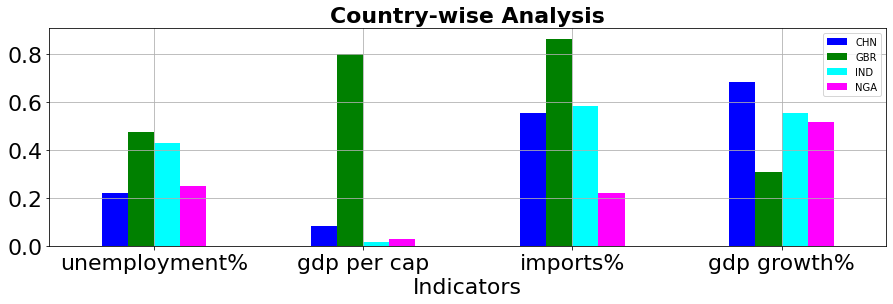

In [39]:
#Visualizing the normalized valuse of the indicators for comparison
df_country_t.plot(kind='bar', color=['blue', 'green', 'cyan', 'magenta'], figsize=(15,4))
plt.xticks(fontsize=22, rotation=0)
plt.yticks(fontsize=22)
plt.xlabel("Indicators",fontsize=22)
plt.title("Country-wise Analysis",fontsize = 22, fontweight='bold')
plt.legend(loc="upper right")
plt.grid(True)

In [40]:
#Deleting the country column
df_year = df.reset_index(level=[0])
df_year = df_year.iloc[:,[1,2,3,4,5]]

In [41]:
#Choosing Year as the index
df_year2 = df_year.set_index("year")

In [42]:
#finding the mean of each column based on years
df_year2 = df_year2.groupby(level='year',axis=0).mean()
df_year2.head()

,unemployment%,gdp per cap,imports%,gdp growth%
year,,,,
2000,0.254763,0.141508,0.350372,0.485388
2001,0.239174,0.140053,0.446954,0.487056
2002,0.271940,0.152549,0.430454,0.605054
2003,0.283487,0.175986,0.550360,0.578051
2004,0.266792,0.207841,0.513593,0.595512


In [43]:
def lineplot(col):
    """This functions creates a plot based on the selected column from the indicators.
    it takes year as the x-axis and the selected column as the -axis
    The plots designs are modified inside the function
    
    """

    df_year2[col].plot(kind="line",figsize=(8,5), fontsize = 14, marker='o', linewidth=2)
    plt.xlabel('Year', fontsize=18, fontdict=None, labelpad=None, loc=None)

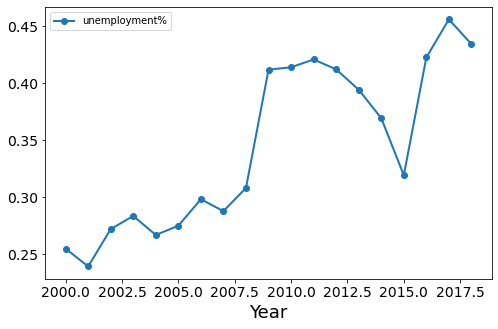

In [44]:
col1 = [('unemployment%')]
lineplot(col1)

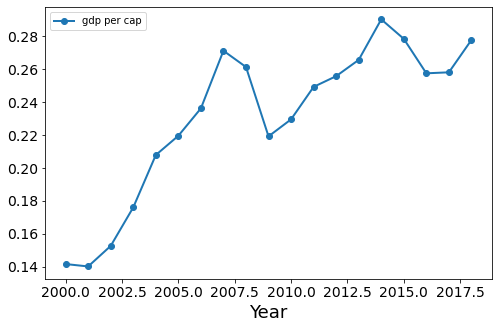

In [45]:
col2 = [('gdp per cap')]
lineplot(col2)

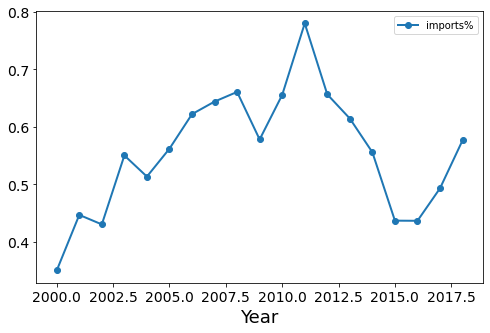

In [46]:
col3 = [('imports%')]
lineplot(col3)

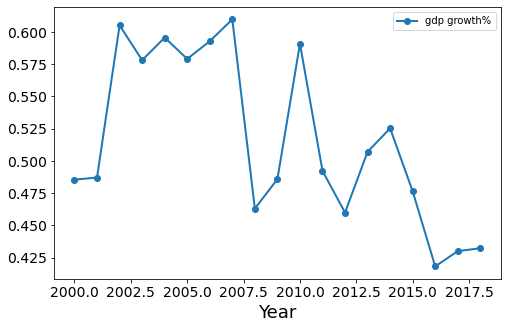

In [47]:
col4 = [('gdp growth%')]
lineplot(col4)